# 1. Import des bibliothèques

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2025-10-10 06:52:47.042869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr

In [1]:
pwd

'/tf/code/notebooks/phase_1'

# 2. Chargement du modèle

In [3]:
MODEL_PATH = '/tf/code/notebooks/phase_1/multiclass_classifier_model.h5'
model = load_model(MODEL_PATH)

W0000 00:00:1759884385.046693    8207 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# 3. Préparation du générateur de validation

In [5]:
BASE_DIR = '/tf/code/notebooks/phase_1'
VALIDATION_DIR = os.path.join(BASE_DIR, 'multiclass_data')
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1333 images belonging to 5 classes.


# 4. Évaluation et Matrice de Confusion

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-08 00:48:00.416704: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 19267584 exceeds 10% of free system memory.
2025-10-08 00:48:00.632058: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 51380224 exceeds 10% of free system memory.
2025-10-08 00:48:01.037151: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 51380224 exceeds 10% of free system memory.
2025-10-08 00:48:01.870028: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 19267584 exceeds 10% of free system memory.
2025-10-08 00:48:01.9122

42/42 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.9572 - loss: 0.1359
Perte sur les données de validation : 0.1359
Précision sur les données de validation : 0.9572
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step


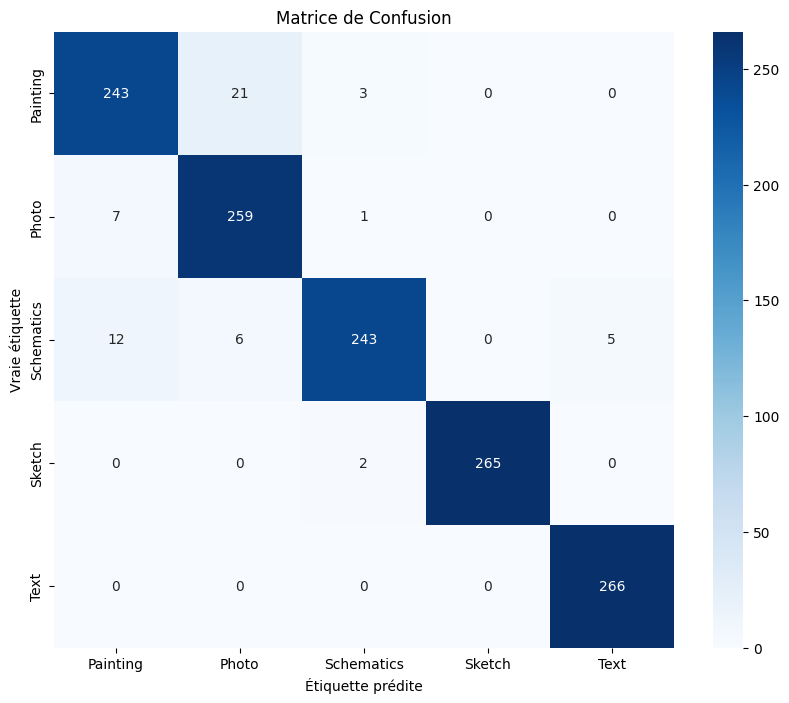

In [6]:
# Évaluation simple
loss, accuracy = model.evaluate(validation_generator)
print(f'Perte sur les données de validation : {loss:.4f}')
print(f'Précision sur les données de validation : {accuracy:.4f}')

# Prédictions pour la matrice de confusion
validation_steps = validation_generator.samples // BATCH_SIZE + 1
predictions = model.predict(validation_generator, steps=validation_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Vraies étiquettes
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matrice de Confusion')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

# 5. Prédiction sur une nouvelle image

In [12]:
image_path=r'img_3.jpg'
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prédiction
    prediction = model.predict(img_array)[0]
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[predicted_class_index]
    predicted_class_label = class_labels[predicted_class_index]

    print(f'Prédiction : {predicted_class_label} (Confiance: {confidence:.2f})')

predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prédiction : Painting (Confiance: 0.71)


#  Après Fine Tuning 

In [5]:
MODEL_PATH = '/tf/code/notebooks/phase_1/multiclass_classifier_model_finetuned.h5'
model_finetuned = load_model(MODEL_PATH)

In [6]:
BASE_DIR = '/tf/code/notebooks/phase_1'
VALIDATION_DIR = os.path.join(BASE_DIR, 'multiclass_data')
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1333 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-10 06:55:47.263808: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 51380224 exceeds 10% of free system memory.
2025-10-10 06:55:47.366126: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 51380224 exceeds 10% of free system memory.
2025-10-10 06:55:47.415729: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 154140672 exceeds 10% of free system memory.
2025-10-10 06:55:47.508378: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 156905472 exceeds 10% of free system memory.
2025-10-10 06:55:47.81

42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9602 - loss: 0.1180
Perte sur les données de validation : 0.1180
Précision sur les données de validation : 0.9602
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step


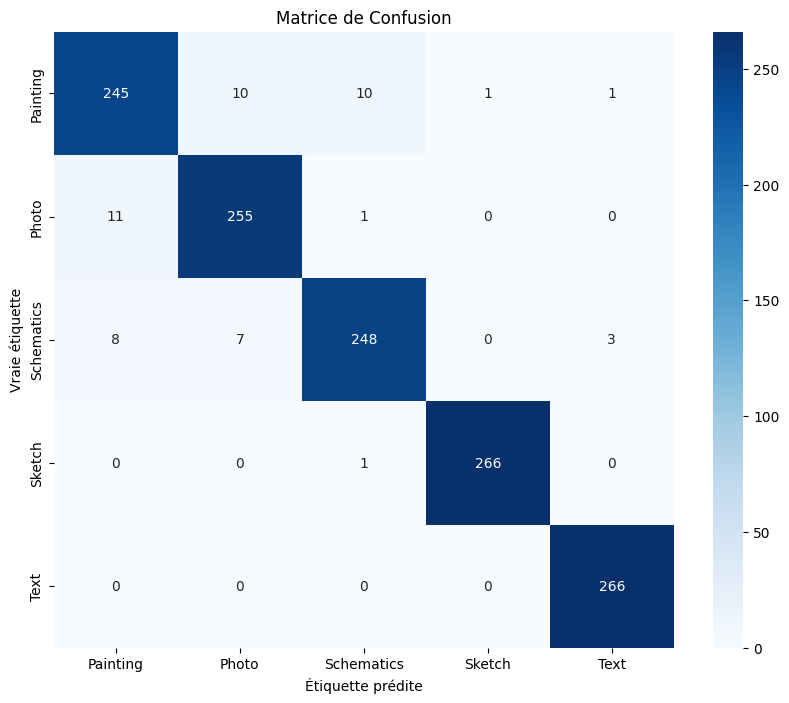

In [7]:
# Évaluation simple
loss, accuracy = model_finetuned.evaluate(validation_generator)
print(f'Perte sur les données de validation : {loss:.4f}')
print(f'Précision sur les données de validation : {accuracy:.4f}')

# Prédictions pour la matrice de confusion
validation_steps = validation_generator.samples // BATCH_SIZE + 1
predictions = model_finetuned.predict(validation_generator, steps=validation_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Vraies étiquettes
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matrice de Confusion')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()

In [12]:
image_path=r'img_6.jpg'
def predict_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prédiction
    prediction = model_finetuned.predict(img_array)[0]
    predicted_class_index = np.argmax(prediction)
    confidence = prediction[predicted_class_index]
    predicted_class_label = class_labels[predicted_class_index]

    print(f'Prédiction : {predicted_class_label} (Confiance: {confidence:.2f})')

predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prédiction : Painting (Confiance: 0.79)
